## Loading the data

In [10]:
import numpy as np

# Load stimuli
with open('/ssd_scratch/cvit/shaon/csai_4/data/stimuli.txt', 'r') as f:
    sentences = [line.strip() for line in f.readlines()]
    # print(sentences)

# Load fMRI data for both subjects
subj1_data = np.load('/ssd_scratch/cvit/shaon/csai_4/data/subj1.npy', allow_pickle=True).item()
subj2_data = np.load('/ssd_scratch/cvit/shaon/csai_4/data/subj2.npy', allow_pickle=True).item()

# Print available brain regions
print("Brain ROIs:", list(subj1_data.keys()))

# Print first 5-6 values for each brain region
for roi in subj1_data.keys():
    print(f"\nFirst 6 values for {roi}:")
    print(subj1_data[roi][:6])



Brain ROIs: ['language', 'vision', 'dmn', 'task']

First 6 values for language:
[[-4.80611567 -4.58436357 -0.34787147 ...  3.76586198  3.01573205
   1.45281303]
 [ 3.37973718  0.60592965  3.7661773  ...  7.52970958  4.08423533
   3.35879479]
 [-0.23922059  0.31543971  2.68080231 ...  4.57699837  4.08193925
   3.18332798]
 [ 0.41250045 -2.48449636  0.13318477 ...  2.55235419  1.46164818
   0.90089143]
 [ 1.12589658  1.13367442 -0.42090705 ... -2.66333654 -1.21841505
  -2.75506846]
 [ 1.97857635  1.72256183  3.90609449 ...  1.57467942 -1.97040817
  -0.51352283]]

First 6 values for vision:
[[ 10.92026478  13.88504383   8.03793147 ... -10.11296459  -9.93924486
   -8.42341808]
 [ -6.25776885  -0.30330221  -2.65186041 ...  -2.15170392  -4.44855112
   -1.38273663]
 [  4.09027124   8.57396632   0.64009411 ...  -6.41515448  -5.71263532
   -3.50753665]
 [ -2.39198265  -1.48343017  -0.244117   ...   0.26016586   0.33748555
   -0.16850411]
 [  3.31411054   4.24353779  -2.14390979 ...   9.40409751

/tmp/ipykernel_34872/300958533.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

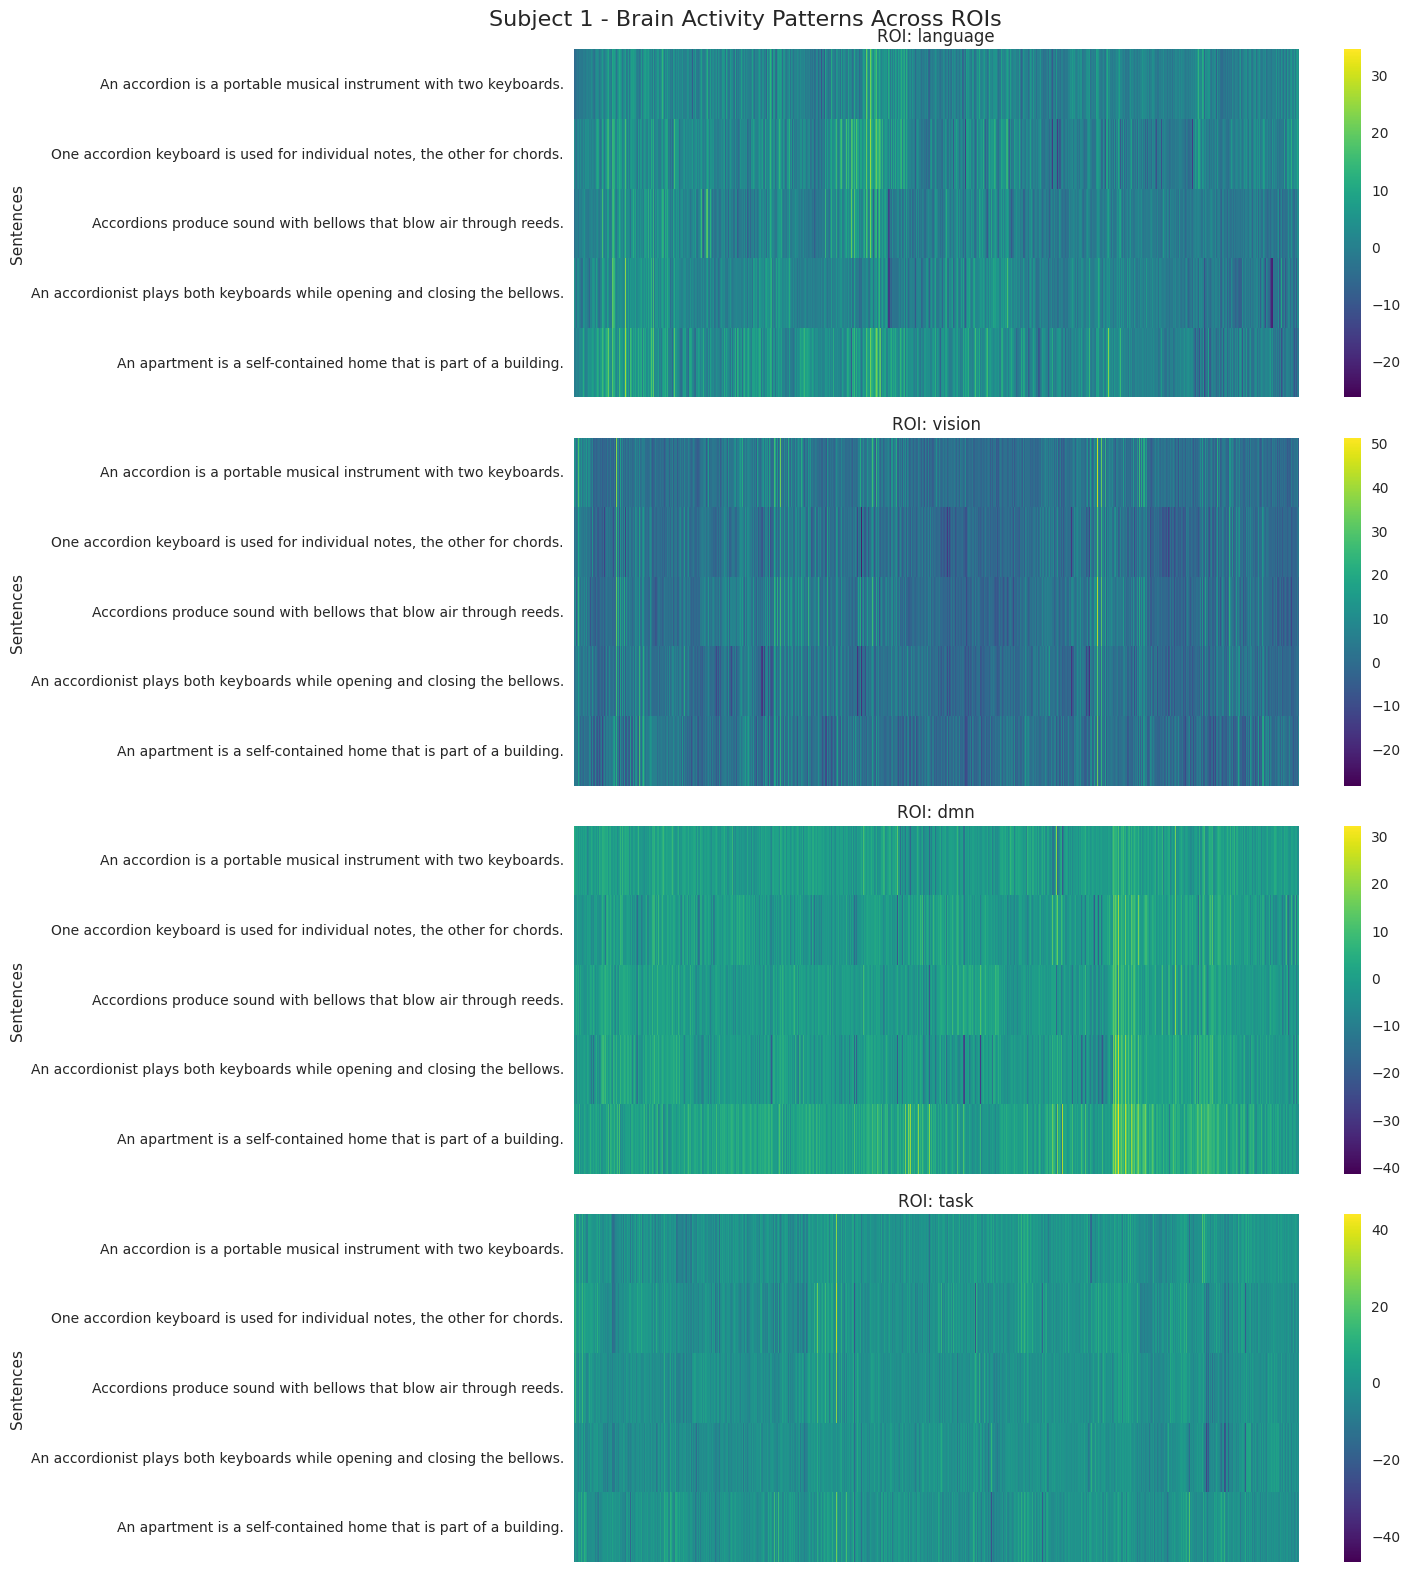

<Figure size 1500x1000 with 0 Axes>

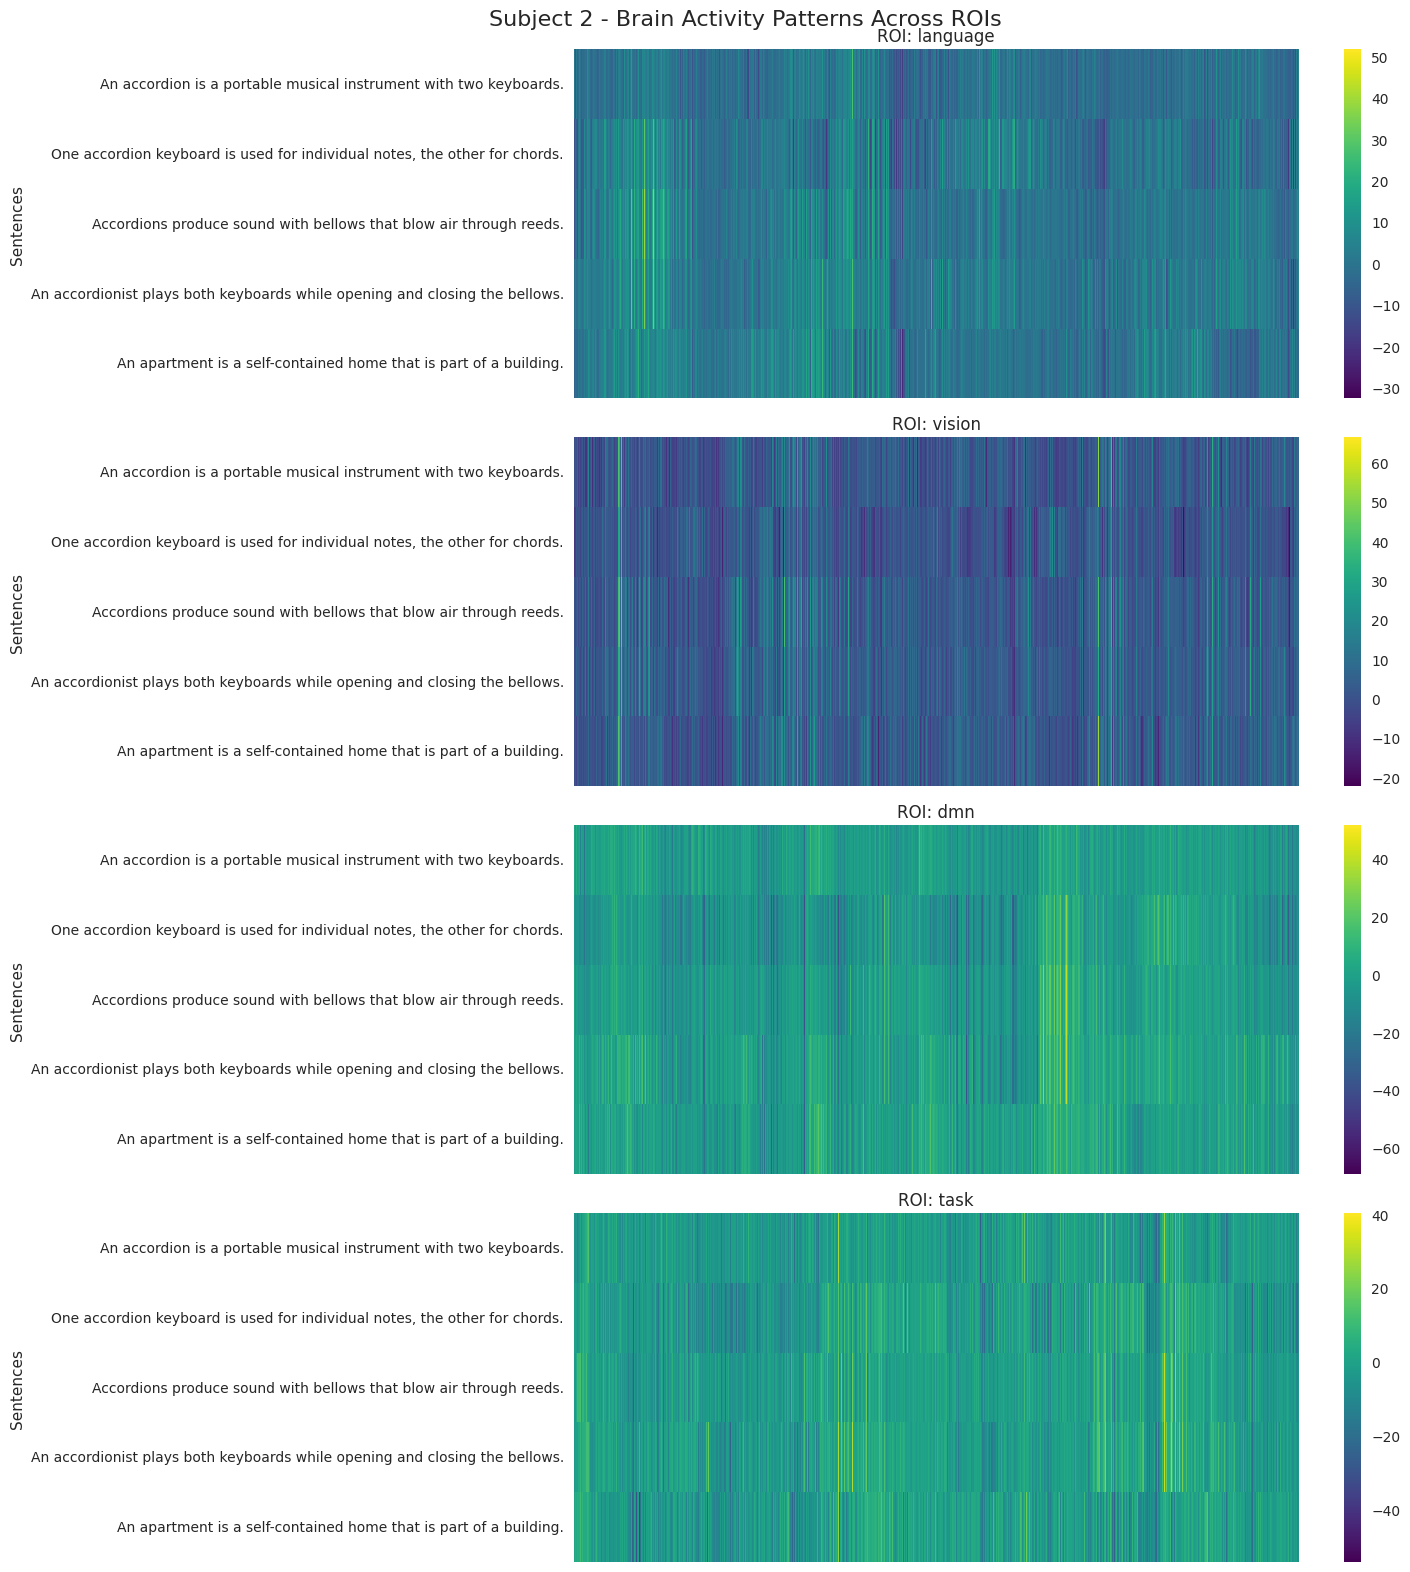


Example sentences and their brain activities:

Sentence 1: An accordion is a portable musical instrument with two keyboards.

Brain activity patterns:
language: [-4.80611567 -4.58436357 -0.34787147 -1.16741104 -0.48998712]...
vision: [10.92026478 13.88504383  8.03793147  8.2062726   5.04371518]...
dmn: [ 0.22464927  0.14285916 -0.32957955 -2.03929487 -1.44368259]...
task: [14.55645543 -1.69520375  3.68853216 11.48632191 16.3854283 ]...

Sentence 2: One accordion keyboard is used for individual notes, the other for chords.

Brain activity patterns:
language: [3.37973718 0.60592965 3.7661773  3.1369437  5.25159408]...
vision: [-6.25776885 -0.30330221 -2.65186041  1.12542348  1.31896973]...
dmn: [-6.12910642 -9.27032921 -4.55386568 -3.25580574 -6.38113343]...
task: [10.58683158  3.04888178  7.58796473  9.9905516   9.94450192]...

Sentence 3: Accordions produce sound with bellows that blow air through reeds.

Brain activity patterns:
language: [-0.23922059  0.31543971  2.68080231  2.43993

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))

# Pick a few example sentences to visualize (first 5)
example_sentences = sentences[:5]

# Plot for each subject
for subject_num, subject_data in enumerate([subj1_data, subj2_data], 1):
    plt.figure(figsize=(15, 10))
    
    # Create subplots for each ROI
    num_rois = len(subject_data.keys())
    fig, axes = plt.subplots(num_rois, 1, figsize=(15, 4*num_rois))
    fig.suptitle(f'Subject {subject_num} - Brain Activity Patterns Across ROIs', fontsize=16)
    
    # Plot each ROI
    for idx, (roi, data) in enumerate(subject_data.items()):
        # Get data for example sentences
        roi_data = data[:5]  # First 5 sentences
        
        # Create heatmap
        sns.heatmap(roi_data, ax=axes[idx], cmap='viridis', 
                   xticklabels=False, yticklabels=example_sentences)
        axes[idx].set_title(f'ROI: {roi}')
        axes[idx].set_ylabel('Sentences')
    
    plt.tight_layout()
    plt.show()

# Print the example sentences and their corresponding brain activities
print("\nExample sentences and their brain activities:")
for i, sent in enumerate(example_sentences):
    print(f"\nSentence {i+1}: {sent}")
    print("\nBrain activity patterns:")
    for roi in subj1_data.keys():
        print(f"{roi}: {subj1_data[roi][i][:5]}...")  # Show first 5 values


## SBERT and T5

In [2]:
from sentence_transformers import SentenceTransformer
from transformers import T5Tokenizer, T5EncoderModel
import torch

# SBERT Models
sbert1 = SentenceTransformer('all-MiniLM-L6-v2')
sbert2 = SentenceTransformer('paraphrase-MiniLM-L3-v2')

# T5 Model
t5_model_name = 'sentence-transformers/sentence-t5-base'
t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_name)
t5_model = T5EncoderModel.from_pretrained(t5_model_name)

def get_t5_embedding(sent):
    inputs = t5_tokenizer(sent, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        embeddings = t5_model(**inputs).last_hidden_state
    return embeddings.mean(dim=1).squeeze().numpy()


/home2/shaon/miniconda3/envs/trans/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home2/shaon/miniconda3/envs/trans/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1602: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you u

## CLIP

In [3]:
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')
tokenizer = open_clip.get_tokenizer('ViT-B-32')

def get_clip_embedding(sent):
    with torch.no_grad():
        tokens = tokenizer([sent])
        emb = model.encode_text(tokens)
        return emb.squeeze().numpy()


/home2/shaon/miniconda3/envs/trans/lib/python3.11/site-packages/open_clip/factory.py:388: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


## Run and Save All Embeddings

In [4]:
import os

def extract_and_save_embeddings(sentences, model_name):
    if model_name == 'sbert1':
        embeddings = sbert1.encode(sentences, show_progress_bar=True)
    elif model_name == 'sbert2':
        embeddings = sbert2.encode(sentences, show_progress_bar=True)
    elif model_name == 't5':
        embeddings = np.array([get_t5_embedding(sent) for sent in sentences])
    elif model_name == 'clip':
        embeddings = np.array([get_clip_embedding(sent) for sent in sentences])
    else:
        raise ValueError("Unknown model")
    
    os.makedirs('embeddings', exist_ok=True)
    np.save(f'/ssd_scratch/cvit/shaon/csai_4/embeddings/{model_name}_embeddings.npy', embeddings)

# Extract embeddings for all 4 models
extract_and_save_embeddings(sentences, 'sbert1')
extract_and_save_embeddings(sentences, 'sbert2')
extract_and_save_embeddings(sentences, 't5')
extract_and_save_embeddings(sentences, 'clip')


Batches: 100%|██████████| 20/20 [00:00<00:00, 164.03it/s]


## 2V2 Accuracy evaluation 

In [21]:
from scipy.spatial.distance import cosine
from itertools import combinations
import numpy as np
from scipy.spatial.distance import cdist

def compute_2v2_accuracy(Y_true, Y_pred):
    n = len(Y_true)
    count = 0
    total = 0
    
    for i, j in combinations(range(n), 2):
        d1 = cosine(Y_true[i], Y_pred[i]) + cosine(Y_true[j], Y_pred[j])
        d2 = cosine(Y_true[i], Y_pred[j]) + cosine(Y_true[j], Y_pred[i])
        if d1 < d2:
            count += 1
        total += 1
    
    return count / total


## Rank Accuracy and Top-K

In [25]:
def compute_rank_topk(true_embeddings, pred_embeddings, k=5):
    ranks, topk = [], 0
    dist_matrix = cdist(pred_embeddings, true_embeddings, 'cosine')
    for i, row in enumerate(dist_matrix):
        sorted_indices = np.argsort(row)
        rank = np.where(sorted_indices == i)[0][0] + 1  # 1-based
        ranks.append(rank)
        if rank <= k:
            topk += 1
    return np.median(ranks), topk / len(true_embeddings)

## Information Mapping Heatmaps

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_heatmap(ridge_model, embedding_model_name, roi, top_n=20):
    # ridge_model.coef_ shape: (n_voxels, embedding_dim)
    avg_weights = np.mean(np.abs(ridge_model.coef_), axis=0)

    # Sort by most influential features
    sorted_idx = np.argsort(avg_weights)[-top_n:]
    sorted_weights = avg_weights[sorted_idx]

    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=sorted_idx, y=sorted_weights, palette='magma')
    plt.title(f'Top {top_n} Embedding Features for {embedding_model_name} → {roi}')
    plt.xlabel("Embedding Dimensions")
    plt.ylabel("Average Weight Magnitude")
    plt.show()


## Train Encoders for Each ROI (using Ridge Regression)

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np

def train_encoder(X, Y, alpha=1.0, k=5, model_name=None, roi_name=None, plot_heatmap=False):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    pearson_scores, acc_2v2_scores = [], []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]

        model = Ridge(alpha=alpha)
        model.fit(X_train, Y_train)

        Y_pred = model.predict(X_test)
        
        # Pearson Correlation
        scores = [np.corrcoef(y_true, y_pred)[0,1] for y_true, y_pred in zip(Y_test, Y_pred)]
        pearson_scores.append(np.mean(scores))

        # 2V2 Accuracy
        acc_2v2 = compute_2v2_accuracy(Y_test, Y_pred)
        acc_2v2_scores.append(acc_2v2)

    # After cross-validation, fit once on all data to visualize feature importance
    if plot_heatmap:
        final_model = Ridge(alpha=alpha)
        final_model.fit(X, Y)
        plot_feature_heatmap(final_model, model_name, roi_name)
    
    return np.mean(pearson_scores), np.mean(acc_2v2_scores)



## Run Training for Each ROI and Each Model

==> subj1 | sbert1


/tmp/ipykernel_29041/4223668309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_idx, y=sorted_weights, palette='magma')


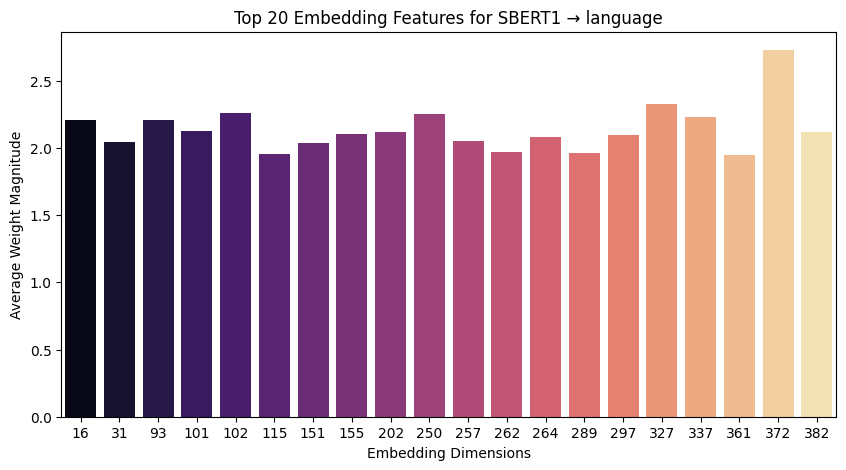

language: Pearson Correlation = 0.7744, 2V2 = 0.8982


/tmp/ipykernel_29041/4223668309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_idx, y=sorted_weights, palette='magma')


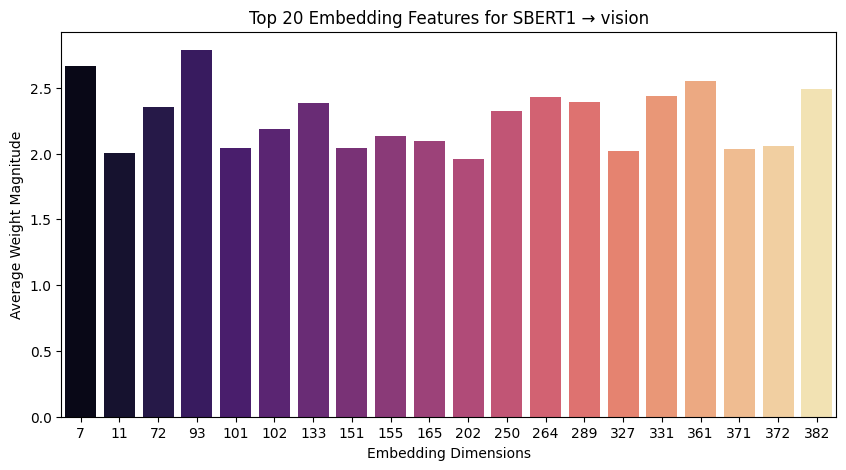

vision: Pearson Correlation = 0.8186, 2V2 = 0.8897


/tmp/ipykernel_29041/4223668309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_idx, y=sorted_weights, palette='magma')


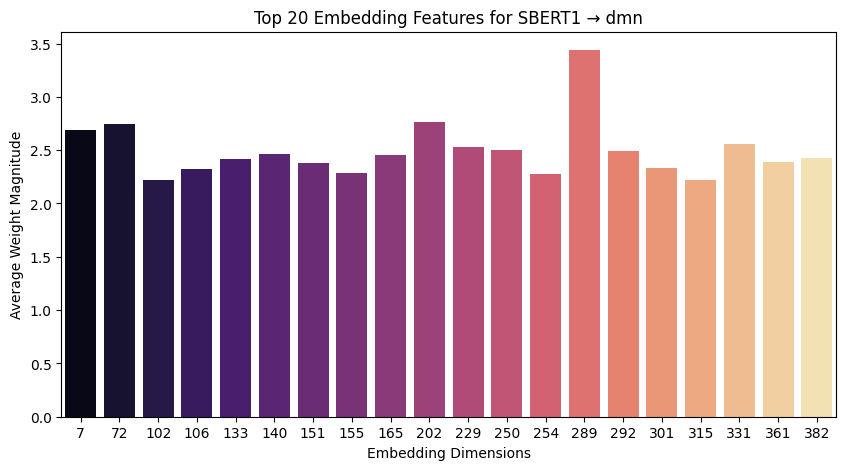

dmn: Pearson Correlation = 0.5981, 2V2 = 0.8097


/tmp/ipykernel_29041/4223668309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_idx, y=sorted_weights, palette='magma')


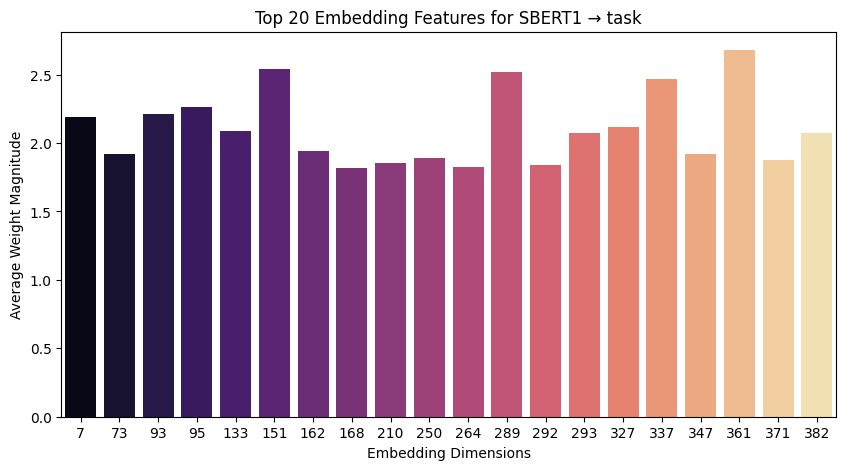

task: Pearson Correlation = 0.6064, 2V2 = 0.8211
==> subj1 | sbert2
language: Pearson Correlation = 0.6946, 2V2 = 0.8102
vision: Pearson Correlation = 0.7539, 2V2 = 0.8213
dmn: Pearson Correlation = 0.4865, 2V2 = 0.7437
task: Pearson Correlation = 0.4983, 2V2 = 0.7475
==> subj1 | t5
language: Pearson Correlation = 0.7646, 2V2 = 0.8930
vision: Pearson Correlation = 0.8071, 2V2 = 0.8712
dmn: Pearson Correlation = 0.5742, 2V2 = 0.7965
task: Pearson Correlation = 0.5927, 2V2 = 0.8223
==> subj1 | clip
language: Pearson Correlation = 0.6577, 2V2 = 0.8321
vision: Pearson Correlation = 0.7228, 2V2 = 0.8319
dmn: Pearson Correlation = 0.4531, 2V2 = 0.7573
task: Pearson Correlation = 0.4643, 2V2 = 0.7727
==> subj2 | sbert1
language: Pearson Correlation = 0.6339, 2V2 = 0.8523
vision: Pearson Correlation = 0.7904, 2V2 = 0.8732
dmn: Pearson Correlation = 0.5242, 2V2 = 0.8071
task: Pearson Correlation = 0.4619, 2V2 = 0.7914
==> subj2 | sbert2
language: Pearson Correlation = 0.5210, 2V2 = 0.7629
visio

In [13]:
embedding_models = ['sbert1', 'sbert2', 't5', 'clip']
subjects = {'subj1': subj1_data, 'subj2': subj2_data}

results = {}

for subj_name, subj_data in subjects.items():
    results[subj_name] = {}
    for model_name in embedding_models:
        print(f"==> {subj_name} | {model_name}")
        X = np.load(f'/ssd_scratch/cvit/shaon/csai_4/embeddings/{model_name}_embeddings.npy')
        
        results[subj_name][model_name] = {}
        for roi, Y in subj_data.items():
            score = train_encoder(
                X, Y, alpha=1.0, k=5,
                model_name=model_name.upper(),
                roi_name=roi,
                plot_heatmap=(subj_name == "subj1" and model_name == "sbert1")  # only once to avoid spamming
            )
            results[subj_name][model_name][roi] = score
            print(f"{roi}: Pearson Correlation = {score[0]:.4f}, 2V2 = {score[1]:.4f}")


## Pos Masking for Interpretability
Why ?
To understand what types of words (nouns, verbs, adjectives) are most important to brain region activations


Step-by-step plan:

Mask out (remove) one POS category at a time (like all verbs).

Recompute embeddings with the masked sentence.

Train encoder with these masked embeddings.

Compare scores for each ROI

# Load a pretrained English NLP pipeline from spaCy specifically the small English model  

In [6]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [14]:
import spacy

# Load English POS tagger (make sure it's downloaded first)
nlp = spacy.load("en_core_web_sm")

def mask_pos(sentences, pos_to_mask):
    """Return a new list of sentences with the specified POS masked."""
    masked = []
    for sent in sentences:
        doc = nlp(sent)
        masked_sent = " ".join(
            "[MASK]" if token.pos_ in pos_to_mask else token.text for token in doc
        )
        masked.append(masked_sent)
    return masked


In [15]:
# Load stimuli
with open('/ssd_scratch/cvit/shaon/csai_4/data/stimuli.txt', 'r') as f:
    sentences = [line.strip() for line in f.readlines()]


noun_masked = mask_pos(sentences, ["NOUN"])
verb_masked = mask_pos(sentences, ["VERB"])
adj_masked  = mask_pos(sentences, ["ADJ"])


print(noun_masked)

['An [MASK] is a portable musical [MASK] with two [MASK] .', 'One [MASK] [MASK] is used for individual [MASK] , the other for [MASK] .', '[MASK] produce [MASK] with [MASK] that blow [MASK] through [MASK] .', 'An [MASK] plays both [MASK] while opening and closing the [MASK] .', 'An [MASK] is a [MASK] - contained [MASK] that is [MASK] of a [MASK] .', 'An [MASK] may have one or more [MASK] , as well as a [MASK] and a [MASK] .', 'Some [MASK] are for single [MASK] , [MASK] for [MASK] .', 'The [MASK] [MASK] can have a [MASK] , a laundry [MASK] or extra [MASK] [MASK] .', 'An [MASK] is a [MASK] that can be green , red or yellow .', '[MASK] have thin [MASK] , a crisp , sweet [MASK] and [MASK] inside .', 'Some very tart [MASK] are used to make [MASK] .', '[MASK] can be eaten raw , roasted or baked in [MASK] .', 'Arson is the criminal [MASK] of burning a [MASK] or [MASK] .', 'A [MASK] [MASK] determines if a [MASK] was caused by [MASK] or [MASK] .', 'Arson can be done to cause [MASK] to [MASK] or 

In [16]:
from sentence_transformers import SentenceTransformer

# SBERT Models
model = SentenceTransformer('all-MiniLM-L6-v2')  

embeddings_noun = model.encode(noun_masked, normalize_embeddings=True)
embeddings_verb = model.encode(verb_masked, normalize_embeddings=True)
embeddings_adj  = model.encode(adj_masked, normalize_embeddings=True)

# Save for reuse if needed
np.save("/ssd_scratch/cvit/shaon/csai_4/pos_embeddings/masked_embeddings_noun.npy", embeddings_noun)
np.save("/ssd_scratch/cvit/shaon/csai_4/pos_embeddings/masked_embeddings_verb.npy", embeddings_verb)
np.save("/ssd_scratch/cvit/shaon/csai_4/pos_embeddings/masked_embeddings_adj.npy", embeddings_adj)

/home2/shaon/miniconda3/envs/trans/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1602: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [17]:
subjects = {'subj1': subj1_data, 'subj2': subj2_data}

# POS-masked embedding dictionary
masked_embeddings_dict = {
    "NOUN": embeddings_noun,
    "VERB": embeddings_verb,
    "ADJ": embeddings_adj
}

# Evaluate each POS-mask across all subjects and ROIs
for subj_name, subj_data in subjects.items():
    for pos_name, emb in masked_embeddings_dict.items():
        print(f"\n>> {subj_name.upper()} | Masked POS: {pos_name}")
        for roi in subj_data:
            score = train_encoder(
                emb, subj_data[roi],
                model_name=f"SBERT_MASKED_{pos_name}",
                roi_name=roi,
                plot_heatmap=False
            )
            print(f"Masked {pos_name} → {roi}: Pearson = {score[0]:.4f}, 2V2 = {score[1]:.4f}")

        # print("Masked NOUN → ROI_Language:", score)


>> SUBJ1 | Masked POS: NOUN
Masked NOUN → language: Pearson = 0.7706, 2V2 = 0.8346
Masked NOUN → vision: Pearson = 0.8132, 2V2 = 0.8409
Masked NOUN → dmn: Pearson = 0.5923, 2V2 = 0.7484
Masked NOUN → task: Pearson = 0.6101, 2V2 = 0.7792

>> SUBJ1 | Masked POS: VERB
Masked VERB → language: Pearson = 0.7772, 2V2 = 0.8894
Masked VERB → vision: Pearson = 0.8221, 2V2 = 0.8867
Masked VERB → dmn: Pearson = 0.6050, 2V2 = 0.8076
Masked VERB → task: Pearson = 0.6150, 2V2 = 0.8212

>> SUBJ1 | Masked POS: ADJ
Masked ADJ → language: Pearson = 0.7772, 2V2 = 0.8980
Masked ADJ → vision: Pearson = 0.8203, 2V2 = 0.8883
Masked ADJ → dmn: Pearson = 0.6050, 2V2 = 0.8144
Masked ADJ → task: Pearson = 0.6148, 2V2 = 0.8284

>> SUBJ2 | Masked POS: NOUN
Masked NOUN → language: Pearson = 0.6247, 2V2 = 0.7725
Masked NOUN → vision: Pearson = 0.7841, 2V2 = 0.7938
Masked NOUN → dmn: Pearson = 0.5062, 2V2 = 0.6924
Masked NOUN → task: Pearson = 0.4533, 2V2 = 0.6718

>> SUBJ2 | Masked POS: VERB
Masked VERB → language: 

In [18]:
#Compute the baseline scores (Unmasked)

# Load original sentence embeddings (unmasked)
X_baseline = np.load('/ssd_scratch/cvit/shaon/csai_4/embeddings/sbert1_embeddings.npy')  # Replace with your preferred SBERT

baseline_scores = {}
for subj_name, subj_data in subjects.items():
    baseline_scores[subj_name] = {}
    for roi in subj_data:
        score = train_encoder(
            X_baseline, subj_data[roi],
            model_name="SBERT_UNMASKED",
            roi_name=roi,
            plot_heatmap=False
        )
        baseline_scores[subj_name][roi] = score
        print(f"Baseline → {subj_name} | {roi}: Pearson = {score[0]:.4f}, 2V2 = {score[1]:.4f}")


Baseline → subj1 | language: Pearson = 0.7744, 2V2 = 0.8982
Baseline → subj1 | vision: Pearson = 0.8186, 2V2 = 0.8897
Baseline → subj1 | dmn: Pearson = 0.5981, 2V2 = 0.8097
Baseline → subj1 | task: Pearson = 0.6064, 2V2 = 0.8211
Baseline → subj2 | language: Pearson = 0.6339, 2V2 = 0.8523
Baseline → subj2 | vision: Pearson = 0.7904, 2V2 = 0.8732
Baseline → subj2 | dmn: Pearson = 0.5242, 2V2 = 0.8071
Baseline → subj2 | task: Pearson = 0.4619, 2V2 = 0.7914


## Compute Performance Drop for Each POS Mask

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# POS-masked embedding dictionary
masked_embeddings_dict = {
    "NOUN": embeddings_noun,
    "VERB": embeddings_verb,
    "ADJ": embeddings_adj
}

importance_results = {}

for subj_name, subj_data in subjects.items():
    importance_results[subj_name] = {}
    for pos_name, emb in masked_embeddings_dict.items():
        print(f"\n>> {subj_name.upper()} | Masked POS: {pos_name}")
        importance_results[subj_name][pos_name] = {}
        for roi in subj_data:
            masked_score = train_encoder(
                emb, subj_data[roi],
                model_name=f"SBERT_MASKED_{pos_name}",
                roi_name=roi,
                plot_heatmap=False
            )
            baseline_score = baseline_scores[subj_name][roi]
            
            # Performance drop
            pearson_drop = baseline_score[0] - masked_score[0]
            acc_2v2_drop = baseline_score[1] - masked_score[1]
            
            importance_results[subj_name][pos_name][roi] = {
                "pearson_drop": pearson_drop,
                "acc_2v2_drop": acc_2v2_drop
            }

            print(f"{roi}: ↓ Pearson = {pearson_drop:.4f}, ↓ 2V2 = {acc_2v2_drop:.4f}")



>> SUBJ1 | Masked POS: NOUN
language: ↓ Pearson = 0.0038, ↓ 2V2 = 0.0636
vision: ↓ Pearson = 0.0054, ↓ 2V2 = 0.0488
dmn: ↓ Pearson = 0.0058, ↓ 2V2 = 0.0613
task: ↓ Pearson = -0.0036, ↓ 2V2 = 0.0419

>> SUBJ1 | Masked POS: VERB
language: ↓ Pearson = -0.0029, ↓ 2V2 = 0.0088
vision: ↓ Pearson = -0.0035, ↓ 2V2 = 0.0030
dmn: ↓ Pearson = -0.0069, ↓ 2V2 = 0.0021
task: ↓ Pearson = -0.0086, ↓ 2V2 = -0.0001

>> SUBJ1 | Masked POS: ADJ
language: ↓ Pearson = -0.0028, ↓ 2V2 = 0.0002
vision: ↓ Pearson = -0.0017, ↓ 2V2 = 0.0014
dmn: ↓ Pearson = -0.0069, ↓ 2V2 = -0.0047
task: ↓ Pearson = -0.0083, ↓ 2V2 = -0.0074

>> SUBJ2 | Masked POS: NOUN
language: ↓ Pearson = 0.0092, ↓ 2V2 = 0.0799
vision: ↓ Pearson = 0.0063, ↓ 2V2 = 0.0794
dmn: ↓ Pearson = 0.0180, ↓ 2V2 = 0.1147
task: ↓ Pearson = 0.0086, ↓ 2V2 = 0.1196

>> SUBJ2 | Masked POS: VERB
language: ↓ Pearson = -0.0057, ↓ 2V2 = -0.0078
vision: ↓ Pearson = -0.0034, ↓ 2V2 = -0.0082
dmn: ↓ Pearson = -0.0046, ↓ 2V2 = 0.0008
task: ↓ Pearson = -0.0128, ↓ 2V2 = 

## Visualize Information Mapping

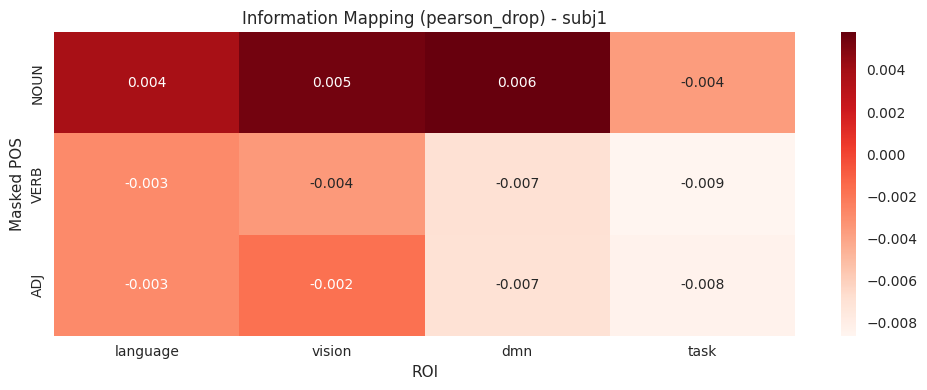

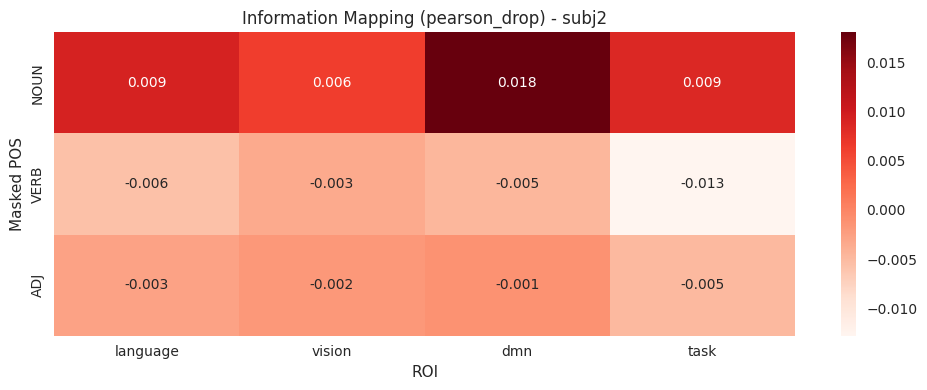

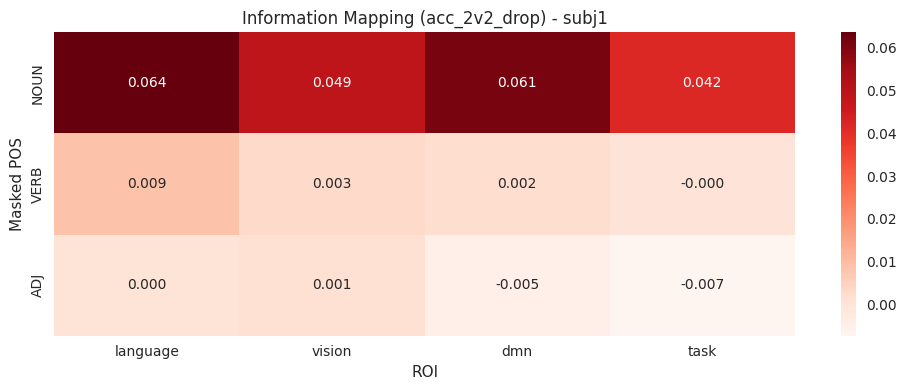

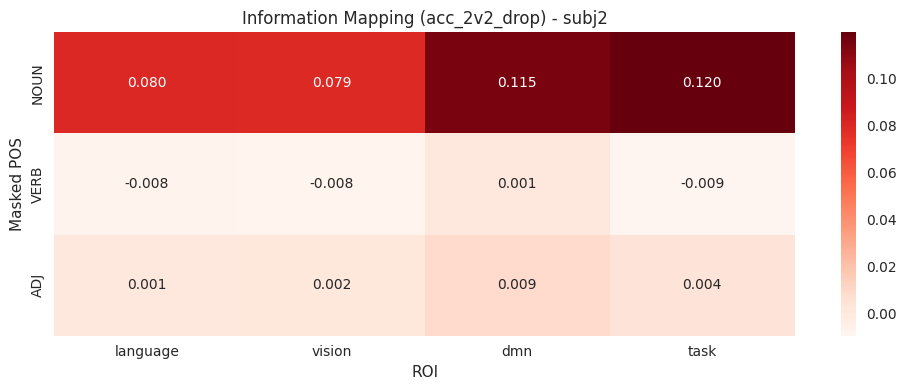

In [20]:
def plot_importance_heatmap(importance_results, metric="pearson_drop"):
    for subj_name in importance_results:
        data = importance_results[subj_name]
        rois = list(next(iter(data.values())).keys())
        pos_types = list(data.keys())

        heatmap_data = np.array([
            [data[pos][roi][metric] for roi in rois]
            for pos in pos_types
        ])

        plt.figure(figsize=(10, 4))
        sns.heatmap(heatmap_data, xticklabels=rois, yticklabels=pos_types,
                    annot=True, cmap="Reds", fmt=".3f")
        plt.title(f"Information Mapping ({metric}) - {subj_name}")
        plt.xlabel("ROI")
        plt.ylabel("Masked POS")
        plt.tight_layout()
        plt.show()

plot_importance_heatmap(importance_results, metric="pearson_drop")
plot_importance_heatmap(importance_results, metric="acc_2v2_drop")


## Decoder Training Function

In [26]:
def train_decoder(Y, X, alpha=1.0, k=5, model_name=None, roi_name=None):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    pearson_scores, acc_2v2_scores, rank_scores, topk_scores = [], [], [], []

    for train_idx, test_idx in kf.split(Y):
        Y_train, Y_test = Y[train_idx], Y[test_idx]
        X_train, X_test = X[train_idx], X[test_idx]

        model = Ridge(alpha=alpha)
        model.fit(Y_train, X_train)
        X_pred = model.predict(Y_test)

        # Pearson Correlation
        scores = [np.corrcoef(x_t, x_p)[0, 1] for x_t, x_p in zip(X_test, X_pred)]
        pearson_scores.append(np.mean(scores))

        # 2V2
        acc_2v2 = compute_2v2_accuracy(X_test, X_pred)
        acc_2v2_scores.append(acc_2v2)

        # Rank and Top-k
        rank, topk = compute_rank_topk(X_test, X_pred, k=5)
        rank_scores.append(rank)
        topk_scores.append(topk)

    return {
        "pearson": np.mean(pearson_scores),
        "2v2": np.mean(acc_2v2_scores),
        "rank": np.mean(rank_scores),
        "topk": np.mean(topk_scores),
        "X_pred": X_pred,  # Return last fold predictions
        "X_test": X_test   # Optional, to verify match
    }


In [28]:
with open("/ssd_scratch/cvit/shaon/csai_4/data/stimuli.txt") as f:
    sentences = [line.strip() for line in f.readlines()]

In [29]:
from scipy.spatial.distance import cdist

def recreate_text(pred_embeddings, original_sentences, original_embeddings, topk=1):
    recreated = []
    dists = cdist(pred_embeddings, original_embeddings, metric='cosine')
    for row in dists:
        top_indices = np.argsort(row)[:topk]
        top_sentences = [original_sentences[i] for i in top_indices]
        recreated.append(top_sentences)
    return recreated


embedding_models = {
    'sbert1': np.load("/ssd_scratch/cvit/shaon/csai_4/embeddings/sbert1_embeddings.npy"),
    'sbert2': np.load("/ssd_scratch/cvit/shaon/csai_4/embeddings/sbert2_embeddings.npy"),
    'clip': np.load("/ssd_scratch/cvit/shaon/csai_4/embeddings/clip_embeddings.npy"),
    't5':   np.load("/ssd_scratch/cvit/shaon/csai_4/embeddings/t5_embeddings.npy")
}

subjects = {
    'subj1': subj1_data,
    'subj2': subj2_data
}

decoder_results = {}

for subj_name, subj_data in subjects.items():
    decoder_results[subj_name] = {}
    for model_name, X in embedding_models.items():
        print(f"\n>>> Decoding for {subj_name} | Model: {model_name.upper()}")
        decoder_results[subj_name][model_name] = {}
        for roi_name, Y in subj_data.items():
            result = train_decoder(Y, X, model_name=model_name.upper(), roi_name=roi_name)
            scores = {k: result[k] for k in ['pearson', '2v2', 'rank', 'topk']}
            decoder_results[subj_name][model_name][roi_name] = scores

            print(f"{roi_name} — Pearson: {scores['pearson']:.4f} | 2V2: {scores['2v2']:.4f} | "
                  f"Rank: {scores['rank']:.2f} | Top-5: {scores['topk']:.2%}")

            # Sentence Reconstruction
            recreated = recreate_text(result["X_pred"], sentences, X, topk=1)
            print(f"\n--- Sentence Reconstruction ({model_name.upper()} | {roi_name}) ---")
            for i in range(5):  # Show top 3 examples
                original = sentences[i]
                reconstructed = recreated[i][0]  # Since topk=1
                print(f"Original     : {original}")
                print(f"Reconstructed: {reconstructed}")
                print()




>>> Decoding for subj1 | Model: SBERT1
language — Pearson: 0.3266 | 2V2: 0.9958 | Rank: 1.60 | Top-5: 81.34%

--- Sentence Reconstruction (SBERT1 | language) ---
Original     : An accordion is a portable musical instrument with two keyboards.
Reconstructed: An accordion is a portable musical instrument with two keyboards.

Original     : One accordion keyboard is used for individual notes, the other for chords.
Reconstructed: A floor is a horizontal surface inside a building, used for walking on.

Original     : Accordions produce sound with bellows that blow air through reeds.
Reconstructed: The severity of the arson depends on whether people were harmed.

vision — Pearson: 0.3396 | 2V2: 0.9969 | Rank: 1.00 | Top-5: 84.21%

--- Sentence Reconstruction (SBERT1 | vision) ---
Original     : An accordion is a portable musical instrument with two keyboards.
Reconstructed: An accordionist plays both keyboards while opening and closing the bellows.

Original     : One accordion keyboard is 